<a href="https://colab.research.google.com/github/gwillig/maschine-learning-notebooks-for-interns/blob/master/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Algos 

## Dataset

(see https://scikit-learn.org/stable/datasets/toy_dataset.html)

The key challenge in breast cancer detection is to classify tumors as malignant or benign. Malignant refers to cancer cells that can invade and kill nearby tissue and spread to other parts of your body. Unlike cancerous tumor(malignant), Benign does not spread to other parts of the body and is safe somehow. Machine learning techniques can be used to improve the accuracy of early diagnosis significantly.

LOC 

In [10]:
!pip install scikit-learn==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.0 MB 230 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [57]:
#1.Step:Import Libs
import pandas as pd
import numpy as np
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
#importing data
from sklearn.datasets import load_breast_cancer

#sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
#scipy
from scipy.stats import loguniform


#2.Step: importing dataset
Diabetes = load_breast_cancer()
#defininf feature and label
X = Diabetes['data']
y = Diabetes['target']
#printing shapes
print(X.shape, y.shape)

#1.Step: creating dataframe from X
# df = pd.DataFrame(Diabetes.data,columns = Diabetes.feature_names)
df = pd.DataFrame(Diabetes.data,columns = Diabetes.feature_names)
df['cancer'] = Diabetes['target']
df.head(10)

(569, 30) (569,)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   
5                 0.07613  ...          23.75           103.40       741.6   
6                 0.05742  ...          27.66           153.20      1606.0   
7                 0.07451  ...          28.14           110.60       897.0   
8                 0.07389  ...          30.73           106.20       739.3   
9                 0.08243  ...          40.68            97.65       711.4   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   worst symmetry  worst fractal dimension  cancer  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  
5          0.3985                  0.12440       0  
6          0.3063                  0.08368       0  
7          0.3196                  0.11510       0  
8          0.4378                  0.10720       0  
9          0.4366                  0.20750       0  

[10 r

EDA - Exploratory data analysis

In [36]:

#showing head
display(df.head())
print(Diabetes.DESCR)
# Show some info regarding class
display(df.info())
# Show some info regarding staticis
#! To show statics there should be null values
display(df.isnull().sum())
display(df.describe())


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  progression  
0          0.4601                  0.11890            0  
1          0.2750                  0.08902            0  
2          0.3613                  0.08758            0  
3          0.6638                  0.17300            0  
4          0.2364                  0.07678            0  

[5 rows x 31 columns]

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

None

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
progression                0
dtype: int64

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension  progression  
count               569.000000   569.000000  
mean                  0.083946     0.627417  
std                   0.018061     0.483918  
min                   0.055040     0.000000  
25%                   0.071460     0.000000  
50%                   0.080040     1.000000  
75%                   0.092080     1.000000  
max                   0.207500     1.000000  

[8 rows x 31 columns]

So, now we can go on and plot a correlation matrix to see the eventual correlations in the data:

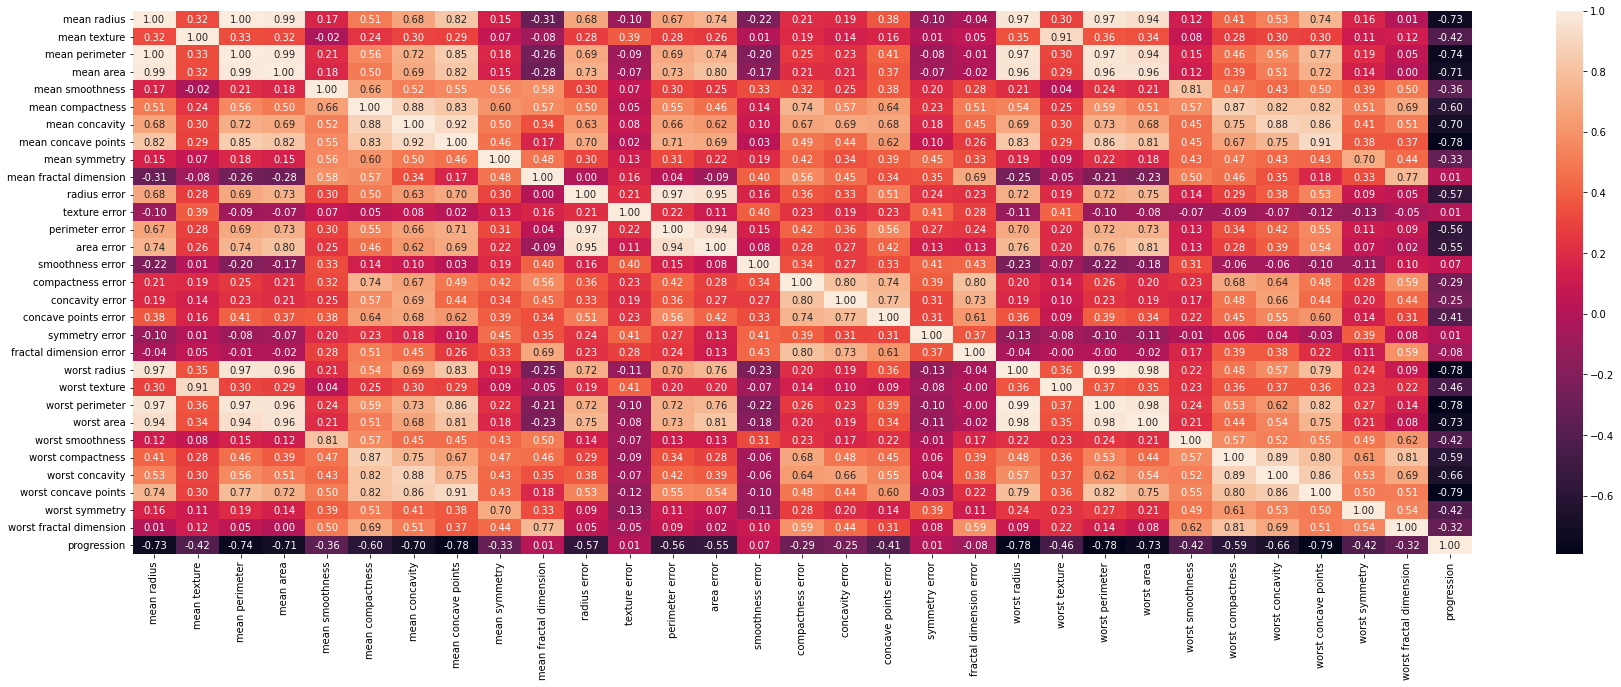

In [41]:
#figure size
plt.figure(figsize=(20, 20))
#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

If we observe the heatmap , we can see all the values are between 0 and 1. The higher value is the higher correlation exists between those two features. You can go through the Correlation matrix to get the overview between the correlation values of the data.

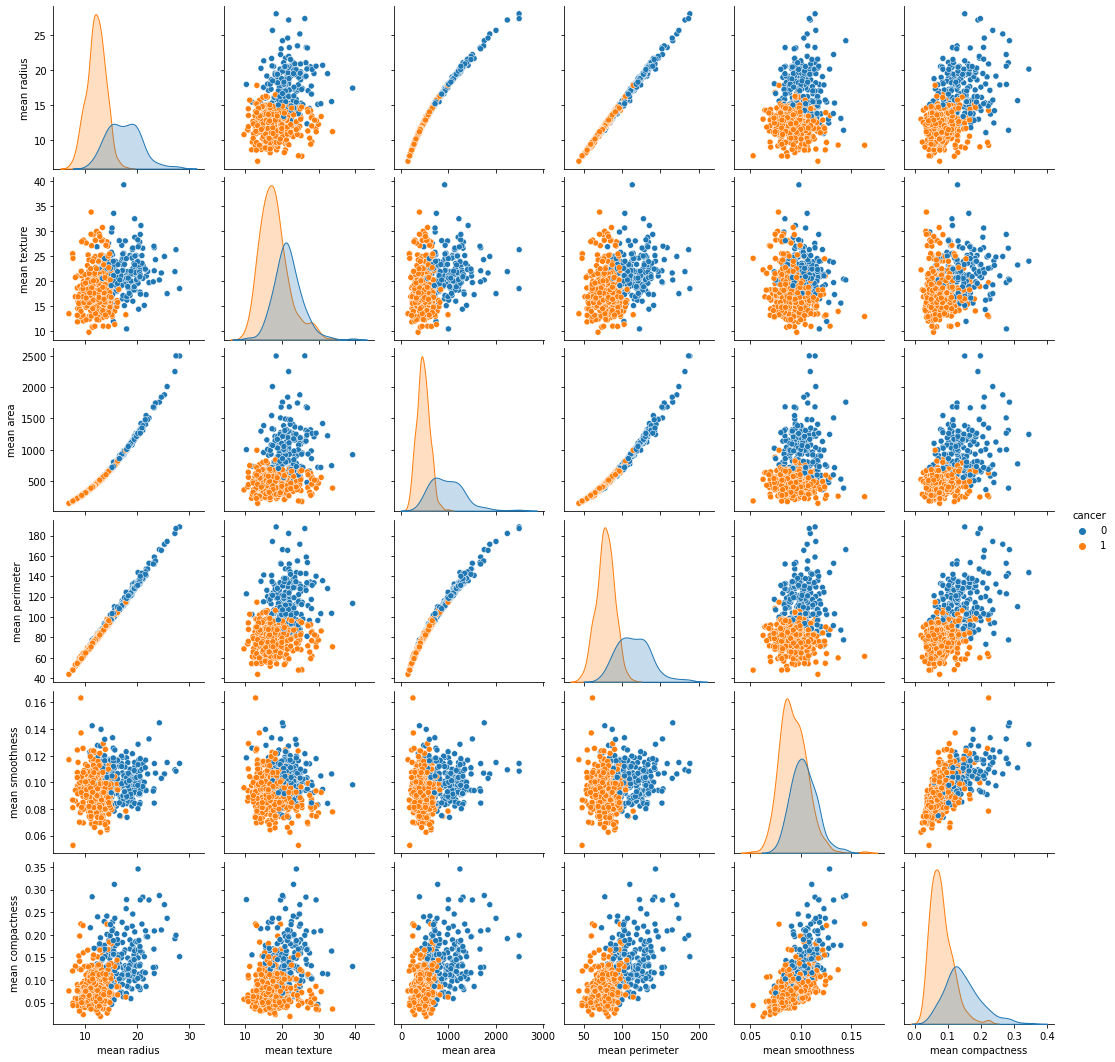

In [45]:
sns.pairplot(df, hue = 'cancer', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness'])

Here, Blue points indicates Malignant case which is life threatening and Orange points represent Benign. To show correlation among the features we could use seaborn heatmap.

It is not possible for us to manually split our dataset also we need to split the dataset in a random manner. To help us with this task, we will be using a SciKit library named train_test_split. We will be using 80% of our dataset for training purpose and 20% for testing.

In [72]:
X_test_scaled

array([[ 0.35821026,  1.45777268,  0.46038842, ...,  1.41704202,
         1.95548699,  0.86738493],
       [-0.49928428,  0.73941263, -0.48944655, ..., -0.46887783,
        -1.03986272,  0.41799227],
       [ 0.12645498, -1.92911834,  0.11836359, ...,  0.15986649,
         0.01762003, -0.19100836],
       ...,
       [ 1.2301895 , -0.11790888,  1.14275323, ...,  0.70782593,
         0.55743007, -0.79548111],
       [-0.76580285,  0.30604131, -0.58506187, ...,  2.27968674,
         6.40168261,  5.06926289],
       [ 0.95208316,  0.93725605,  0.82263147, ..., -0.46245888,
        -0.7265345 , -1.03489307]])

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

array([-2.50147353e-01, -7.83184496e-01,  1.16355985e+00, -1.01204284e+00,
        1.54595606e+00, -1.02942448e+00, -3.77612757e-01, -3.13880055e-01,
        1.20411703e+00, -1.29130795e+00,  1.04768221e+00, -1.49930831e+00,
        1.66183370e+00, -6.81791562e-01, -3.39952524e-01,  4.06919167e+00,
       -7.39730381e-01, -1.20497911e+00, -7.10760971e-01, -9.88867307e-01,
       -8.23741670e-01,  1.14907515e+00, -4.84799574e-01, -6.18461885e-02,
       -2.61735117e-01, -5.45635335e-01, -1.02403362e-01,  1.61218268e-01,
       -7.07864030e-01,  1.90517675e+00, -7.80287555e-01, -2.76219822e-01,
       -1.38922455e+00,  1.89069204e+00, -9.45413192e-01, -3.63128052e-01,
       -8.12153906e-01, -2.26971825e-01, -3.34158642e-01, -3.08086173e-01,
       -5.89089450e-01,  1.58361630e+00, -1.08446636e+00, -1.66136064e-01,
        1.67012150e-01,  1.49630504e-01, -6.26749683e-01, -1.22149167e+00,
       -1.10184801e+00, -1.10184801e+00,  1.50829583e+00,  1.74584499e+00,
        2.13363206e-01, -

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.250147     -0.767966       -0.311695  -0.324081        -0.799677   
1    -0.783184     -0.355792       -0.799459  -0.728135        -0.552631   
2     1.163560      0.649912        1.092208   1.106126        -1.611296   
3    -1.012043      0.268357       -0.898023  -0.908858        -0.399563   
4     1.545956      1.040888        1.585027   1.491080         0.452637   
5    -1.029424      0.944322       -1.037023  -0.920906         0.367203   
6    -0.377613     -1.345009       -0.386671  -0.421642        -0.598196   
7    -0.313880      0.063448       -0.292740  -0.392550        -0.039318   
8     1.204117     -0.049606        1.146965   1.114942         0.079577   
9    -1.291308     -0.527727       -1.256475  -1.078708        -0.821035   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -0.978364       -1.093146            -1.181031      -0.639199   
1         -0.966145       -0.749131            -0.708844      -0.753267   
2         -0.310039        0.326786             0.270188      -0.131414   
3          1.258386        1.862319             0.313576       1.406659   
4          1.057356        1.560953             1.097494       0.633943   
5         -0.673666       -0.786704            -0.768735      -0.407384   
6         -0.446818       -0.583576            -0.589592      -0.753267   
7          0.203966       -0.185015            -0.482586      -0.164531   
8          0.188199        0.362010             0.848344       0.004731   
9         -0.194546       -0.013458            -0.657736       0.847359   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0               -0.532184  ...     -0.371365      -0.807810        -0.443416   
1               -0.504517  ...     -0.663424       1.804030        -0.658985   
2               -1.338913  ...      0.777546      -0.108357         0.710641   
3                3.189834  ...     -1.135873      -0.417762        -0.925259   
4               -0.377828  ...      1.183422       0.851128         1.202126   
5                0.431813  ...     -1.118693      -0.187354        -1.124652   
6               -0.173962  ...     -0.418610      -1.474348        -0.442172   
7                0.408514  ...     -0.369217      -0.560944        -0.219137   
8               -0.867107  ...      1.224225      -0.058984         1.077700   
9                1.260384  ...     -1.157348      -0.376618        -1.088880   

   worst area  worst smoothness  worst compactness  worst concavity  \
0   -0.423707         -0.865690          -0.748543        -1.265893   
1   -0.640708          0.594854          -0.564666        -0.412071   
2    0.685887         -1.970310          -0.337486        -0.048229   
3   -0.958700         -0.798280           0.765774         1.708161   
4    1.040671          0.639793           0.332065         0.415619   
5   -0.938427         -0.798280          -1.071393        -1.113220   
6   -0.457684         -0.569087          -0.174262        -0.433178   
7   -0.428588         -0.146653           0.521938         0.406070   
8    1.168319          0.509468           0.195490         0.614123   
9   -0.955509         -0.393822           0.630531         0.859365   

   worst concave points  worst symmetry  worst fractal dimension  
0             -1.360330       -0.387663                 0.023500  
1             -0.389972        0.160661                -0.338731  
2             -0.314353       -0.867873                -1.010556  
3              0.541873       -0.479618                 2.069539  
4              0.696867        0.070409                -0.412875  
5             -1.262480       -1.109680                -0.886605  
6             -0.434904       -0.535813                -0.051210  
7             -0.208362        1.221550                 0.465535  
8              1.028774       -0.113501                -0.082339  
9      

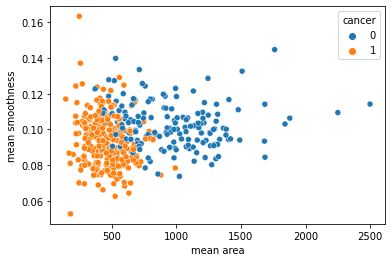

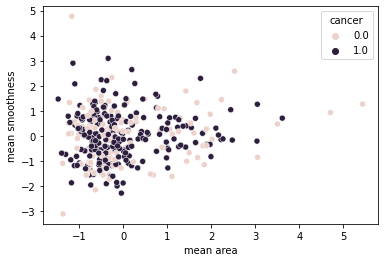

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(['cancer'],axis=1)
y = df['cancer']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# min_train = X_train.min()
# range_train = (X_train - min_train).max()
# X_train_scaled = (X_train - min_train)/ range_train

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Create a scaled dataframe for visu. purpose
df_X_train_scaled = pd.DataFrame()
for key in X_train.keys(): 
  df_X_train_scaled[key] = sc.fit_transform(X_train[[key]]).flatten()

df_X_train_scaled.head(10)

display(sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train))
plt.show()
display(sns.scatterplot(x = df_X_train_scaled['mean area'], y = df_X_train_scaled['mean smoothness'], hue = y_train))



# SVM

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



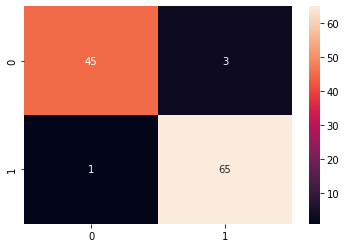

In [100]:
from sklearn import svm

# Train model
svc_model = svm.SVC()
svc_model.fit(X_train_scaled,y_train)
# Predict 
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
display(sns.heatmap(cm, annot=True))

print(classification_report(y_test, y_predict))




# 2. Logistic Regression


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



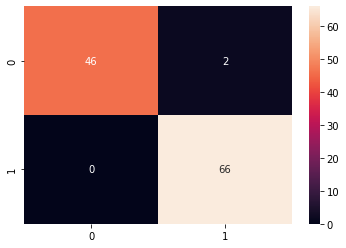

In [98]:
from sklearn.linear_model import LogisticRegression
# Train with Standard scaled Data
lr_classifier = LogisticRegression(random_state = 51, C=1, penalty='l1', solver='liblinear')
lr_classifier.fit(X_train_scaled, y_train)
y_predict = lr_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
display(sns.heatmap(cm, annot=True))
print(classification_report(y_test, y_predict))

# 3. Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



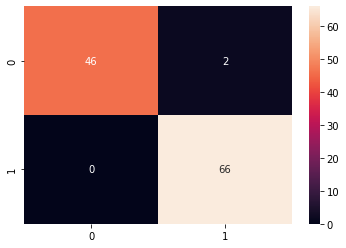

In [103]:
from sklearn.naive_bayes import GaussianNB
# Train with Standard scaled Data
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_scaled, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_scaled)

lr_classifier.fit(X_train_scaled, y_train)
y_predict = lr_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
display(sns.heatmap(cm, annot=True))
print(classification_report(y_test, y_predict))

# Hier weiter machen 
durchschauen von https://medium.com/geeky-bawa/end-to-end-deployment-of-breast-cancer-prediction-through-machine-learning-using-flask-5442ef4c586d 

# Linear Regression Model

Firstly, we have to note that the features have all already been scaled by whoever distributed the dataset (see documentation of the data on scikit-learn), so there is no need to do that.

Now, let’s define the features and the label, and let’s fit the Linear Regression model:

In [28]:
#defining features
X = df.iloc[:,:-1]
#defining label
y = df['progression']
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#fitting the model
reg = LinearRegression().fit(X_train, y_train)
#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
#intercept
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set

the intercept is:-341.38
the slope is:[  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]
Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45


R², or the coefficient of determination, tells us the link between the variability of the data and the correctness of the model; the closer R² to 1 the better, because it means the model is accurate. The results obtained are not satisfactory, being R² close to 0.5, even if it is good that the values are similar between the test and the train set. This is telling us that this type of model is not suitable for this type of problem. Anyway, I want to investigate a couple of metrics:

In [29]:
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

The mean absolute error is: 42.79
The root mean squared error is: 53.85


These are high values (MAE should be “as near as possible” to 0), which continue to make me feel discouraged about the use of this model … but I want to make a couple of visualizations.

First, I want to make a scatter plot of the real values ​​with respect to the predicted ones:

In [ ]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
#showig plot
plt.show()

As can be seen from the graph above, there is no clear tendency for the spots to be distributed around a line, confirming the fact that linear regression is not a good model.

Anyway, I also want to see a graph of the Kernel Density Estimation, which helps us visualize the probability density of a random variable, between real values ​​and those predicted by the linear model:

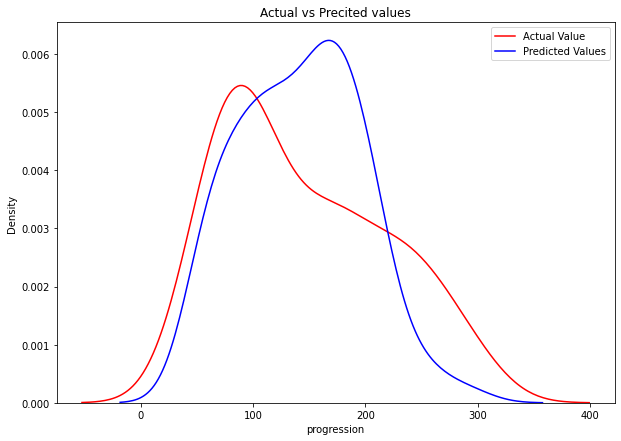

In [30]:
#image dimensions
plt.figure(figsize=(10, 7))
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

# Naive Bayes - Gaussian

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd 
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
traing_model = gnb.fit(X_train, y_train)
y_pred=gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 75 points : 4


In [ ]:
traing_model.predict(ca)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

## Second example for NB





In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
import  pandas as pd
data={"Type":["Banana","Orange","Other"],"Long":[400,0,100],"Not Long":[100,300,100]
 ,"Sweet":[350,150,150],"Not Sweet":[150,150,50],"Yellow":[450,300,50],"Not Yellow":[50,0,150]}
					

df = pd.DataFrame(data)

train_feature_keys = list(df.keys())
train_feature_keys.remove("Type")
train_label_y_key ="Type"
x_train = df[train_feature_keys]
y_train = df[train_label_y_key]
traing_model = gnb.fit(x_train, y_train)

train_feature_keys = list(df.keys())



# Normal distribution 

In [ ]:
import numpy as np 

s1 = np.random.normal(40, 26, 10)
s2 = np.random.normal(40, 26, 35)
s3 = np.random.normal(40, 26, 62)

import scipy.stats
s1 =  scipy.stats.norm(  40, 26).pdf(10)*100
s2 =  scipy.stats.norm(40, 26).pdf(35)*100
s3 =  scipy.stats.norm(40, 26).pdf(62)*100
s1 =  scipy.stats.norm.sf(10,40,26**0.5)*100
s2 = scipy.stats.norm.sf(35,40,26**0.5)*100
s3 =  scipy.stats.norm.sf(62,40,26**0.5)*100

print( round(s1,0),round(s2,0),round(s3,0))

s1 = - math.log(scipy.stats.norm.sf(10,27,314**0.5))*100
s2 =-math.log( scipy.stats.norm.sf(35,27,314**0.5))*100
s3 = -math.log( scipy.stats.norm.sf(62,27,314**0.5))*100
print( round(s1,0),round(s2,0),round(s3,0))

#equal to let's say 125, you'd use SF Survival Function 


100.0 84.0 0.0
18.0 112.0 372.0


In [ ]:
si=26**0.5
mu=40
 
x1=10
x2=4
x3=62
s1 =  scipy.stats.norm(mu, si).pdf(x1)*100
s2 =  scipy.stats.norm(mu, si).pdf(x2)*100
s3 =  scipy.stats.norm(mu, si).pdf(x3)*100
print( round(s1,2),round(s2,2),round(s3,2))
 
si=314**0.5
 
mu=27
 
s1 =  scipy.stats.norm(mu, si).pdf(x1)*100
s2 =  scipy.stats.norm(mu, si).pdf(x2)*100
s3 =  scipy.stats.norm(mu, si).pdf(x3)*100
print( round(s1,2),round(s2,2),round(s3,2))

0.0 4.84 0.0
1.42 2.03 0.32


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


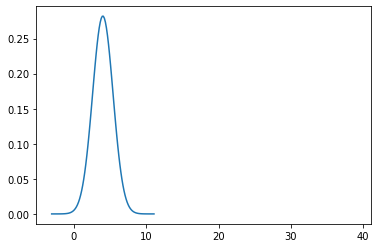

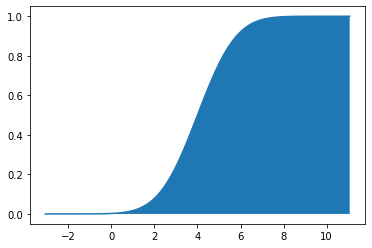

In [ ]:
 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
mu = 4
variance = 4**0.5
sigma = math.sqrt(variance)
### Create the Probability density function
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
ax = sns.lineplot(x, stats.norm.pdf(x, mu, sigma))
# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
part = np.arange(,40,1)
ax.fill_between(part,stats.norm.pdf(part, mu, sigma),)
plt.show()
 
### Create the cumulative distribution function
ax = sns.lineplot(x, stats.norm.cdf(x, mu, sigma))
 
ax.fill_between(x, stats.norm.cdf(x, mu, sigma))

In [ ]:
from scipy import stats
mu=150
si=(1000*0.15*0.85)**0.5
x1=170
x2=20
pro = stats.norm.cdf(x1, loc=mu, scale=si) -stats.norm.cdf(x2, loc=mu, scale=si) 
print(pro*100)
print(stats.norm.cdf(x1, loc=mu, scale=si))

96.17387497624705
0.9617387497624704


In [ ]:
len(data["treatment"])

4

In [ ]:
data_raw={2012:3,2013:0,2014:2,2015:2,2016:0,2017:0,2018:1,2019:3}

data ={"year":[2012,2013,2014,2015,2016,2017,2018,2019],"treatment":[3,0,2,2,0,0,1,3]}
data_raw={2012:3,2013:0,2014:2,2015:2,2016:0,2017:0,2018:1,2019:3}

data ={"year":[2018,2019],"treatment":[1,3]}

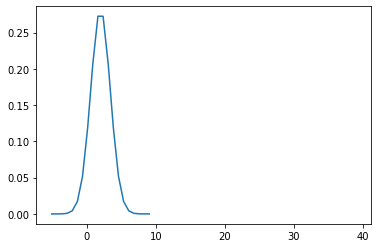

              year  treatment
count     2.000000   2.000000
mean   2018.500000   2.000000
std       0.707107   1.414214
min    2018.000000   1.000000
25%    2018.250000   1.500000
50%    2018.500000   2.000000
75%    2018.750000   2.500000
max    2019.000000   3.000000


In [ ]:
'#Zahnfüllungen von S'
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
df.describe()
mu = df.describe().loc["mean","treatment"]
sigma = df.describe().loc["std","treatment"]
### Create the Probability density function
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 20)
ax = sns.lineplot(x, stats.norm.pdf(x, mu, sigma))
# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
part = np.arange(35,40,1)
ax.fill_between(part,stats.norm.pdf(part, mu, sigma),)
plt.show()
print(df.describe())

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
import  pandas as pd
data={"Type":["Banana","Orange","Other"],"Long":[400,0,100],"Not Long":[100,300,100]
 ,"Sweet":[350,150,150],"Not Sweet":[150,150,50],"Yellow":[450,300,50],"Not Yellow":[50,0,150]}
					

df = pd.DataFrame(data)

train_feature_keys = list(df.keys())
train_feature_keys.remove("Type")
train_label_y_key ="Type"
x_train = df[train_feature_keys]
y_train = df[train_label_y_key]
traing_model = gnb.fit(x_train, y_train)

train_feature_keys = list(df.keys())



Type  Long  Not Long  Sweet  Not Sweet  Yellow  Not Yellow
0  Banana   400       100    350        150     450          50
1  Orange     0       300    150        150     300           0
2   Other   100       100    150         50      50         150

# K-Mean example

## K-Mean with data example

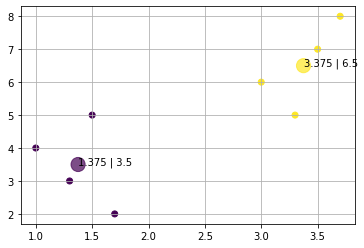

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
'#1.Step: Define the data'
X = np.array([[1,4],
              [1.50,5],
              [1.7,2],
              [1.3,3],
              [3,6],
              [3.5,7],
              [3.7,8],
              [3.3,5]
              ])

'#2.Step: Convert to df and display the data'
df = pd.DataFrame(data=X,columns=["x","y"])
# display(df)
'#3.Step: Create model and fit it to the data'
kmeans = KMeans(n_clusters=2, random_state=1,).fit(X)
'#4.Step: Predict label for each data point'
df["y_predict"] = kmeans.labels_
'#5.1.Step: Display the result of the prediction in a scatter plot'
plt.grid(True)

plt.scatter(x=df["x"],y=df["y"],c=df["y_predict"], cmap='viridis')
'#5.2.Step: Add the cluster center to the scatter plot'
centers = kmeans.cluster_centers_
color = np.arange(len(kmeans.cluster_centers_))

ax = plt.scatter(centers[:, 0], centers[:, 1], s=200, c=color, alpha=0.7,cmap='viridis')

for center in kmeans.cluster_centers_:
  plt.text(center[0],center[1],f'{center[0]} | {center[1]}')

## 2. K-Mean with generated data

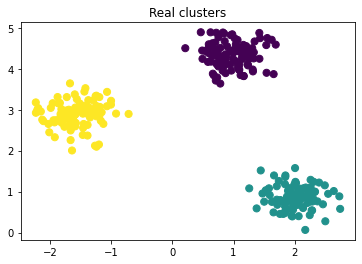

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


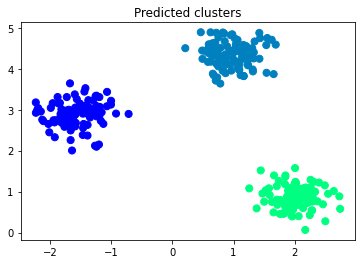

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
'#1.Step: Create data with sklearn'
x, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.3, random_state=0)
'#2.Step: Convert to df'
df= pd.DataFrame({"x1":list(x[:,0]),"x2":list(x[:,1]),"y_true":list(y_true)})
'#3.Step: Display the data'
plt.title("Real clusters")
plt.scatter(df["x1"],df["x2"],c=df["y_true"], s=50, cmap='viridis');
plt.show()
'#4.Step: Create a model'
'#4.1.Step: Create on init. values'
init_own = np.array([[-1.5,3],[1,4],[2,1]])
kmeans = KMeans(n_clusters=3,init=init_own,n_init=10).fit(df[["x1","x2"]])
df["y_pred"] = kmeans.labels_
plt.scatter(df["x1"],df["x2"],c=df["y_pred"], s=50, cmap='winter');
plt.title("Predicted clusters") 
plt.show()


# Visualization

## Plot a gray scale image with the excat


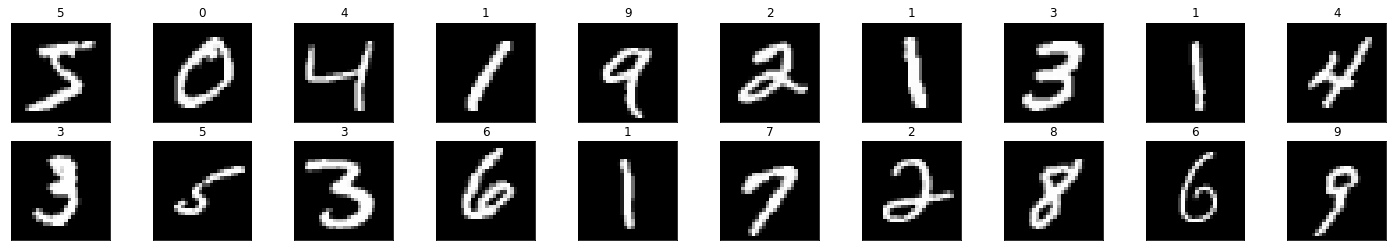

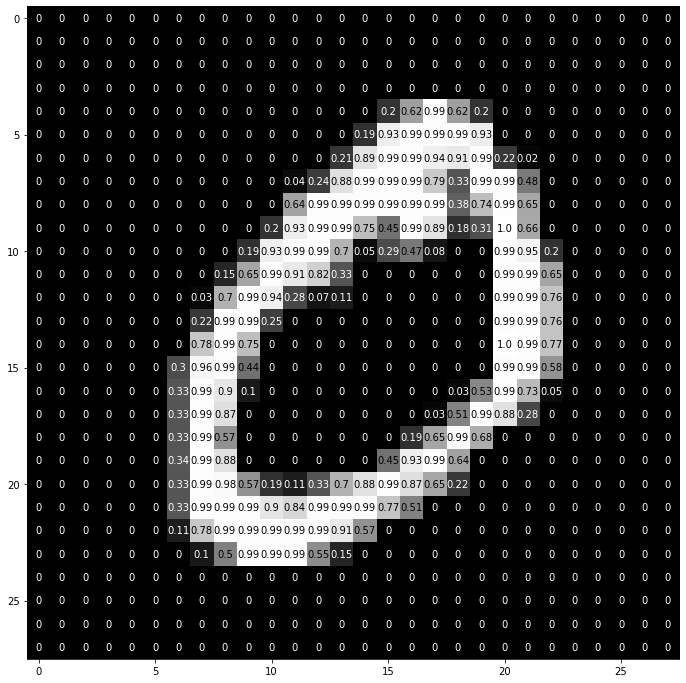

In [ ]:

from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))
    
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# ROC Curve




In [ ]:
#Helper functions
def calculate_recall(tp,fn):
  return tp/(tp+fn)

def calculate_spec(tn,fp):
  return tn/(tn+fp)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

#1.Step: Define the data 
y_true = [0, 0, 1, 0, 0, 1, 1, 1]
y_pred_model_1 = np.array([0.1,0.15,0.2,0.4,0.6,0.8,0.7,0.8])
y_pred_model_2 = np.array([0.9,0.6,0.7,0.4,0.6,0.8,0.7,0.8])


#for differnt thresholds:
roc_value = {"threshold": np.arange(0,1,0.2),"model":{}}
for y_model,color_graph,model_name in zip([y_pred_model_1,y_pred_model_2],
                                          ["coral","green"]
                                          ,["model_1","model_2"]):
  roc_value["model"][model_name] ={"1-spec":[],"recall":[]}
  for threshold in roc_value["threshold"]:
    #Create a copy of the numpy array
    y_pred_thres = y_model.copy()
    y_pred_thres[y_model>=threshold]=1
    y_pred_thres[y_pred_thres<threshold]=0

    tn, fp, fn, tp = confusion_matrix(y_true,y_pred_thres).ravel()
    roc_value["model"][model_name]["1-spec"].append(1-calculate_spec(tn, fp))
    roc_value["model"][model_name]["recall"].append(calculate_recall(tp,fn))


{'model': {'model_1': {'1-spec': [1.0, 0.5, 0.5, 0.0, 0.0],
   'recall': [1.0, 1.0, 0.75, 0.75, 0.5]},
  'model_2': {'1-spec': [1.0, 1.0, 1.0, 0.25, 0.25],
   'recall': [1.0, 1.0, 1.0, 1.0, 0.5]}},
 'threshold': array([0. , 0.2, 0.4, 0.6, 0.8])}

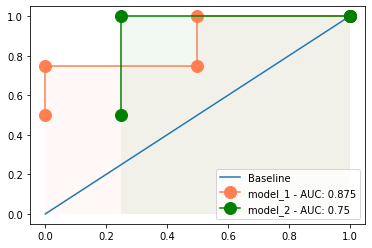

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
#Create list for legend
roc_legend = []
# Create Baseline
x_baseline = np.arange(0,2)
y_baseline = np.arange(0,2)
roc_legend.append("Baseline")
ax = sns.lineplot(x=x_baseline, y=y_baseline)



for y_model,color_graph,model_name in zip([roc_value["model"]["model_1"],roc_value["model"]["model_2"]],
                                          ["coral","green"]
                                          ,["model_1","model_2"]):

  fpr, tpr = y_model["1-spec"],y_model["recall"]


  plt.plot(fpr,tpr, '-o',color=color_graph,markersize=12,)
  plt.fill_between(fpr,tpr, facecolor=color_graph, alpha=0.05)

  # lines is a list of plt.Line2D instances
  auc_value = metrics.auc(fpr, tpr)
  roc_legend.append(f'{model_name} - AUC: {auc_value}')
plt.legend(roc_legend)
plt.show()


Confusion Matrix - Multiclass


In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],
                   [0, 1, 0]])
y_pred = np.array([[1, 0, 0],
                   [0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)

In [ ]:
def create_prediction(x,y,z):
  """
  Creates a list with n classes
  """
  y_predict = []
  for j,times_n in enumerate([x,y,z]):
    for i in range (0,times_n):
      y_predict.append(j)
  y_predict
  print(y_predict)

[0, 1, 1, 2, 2, 2, 2, 2, 2]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])
y_predict = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1,0, 1, 1, 2, 2, 2, 2, 2, 2])

Function Optimization

In [ ]:
from scipy import optimize

def cost_f(x):
   return x**2

optimize.minimize_scalar(cost_f)

     fun: 0.0
    nfev: 8
     nit: 4
 success: True
       x: 0.0

# PyTorch

#### Convert image to tensor batch

##########
shape of the numpy: height x width x dimensions
shape of the numpy array: (300, 200, 3) 
height:300, width:200, dimensions: 3
##########
shape of the tensor: dimensions x height x width
shape of the tensor: torch.Size([3, 300, 200]) 
dimensions:3, height:300, width: 200
##########
shape of the tensor batch: size x  dimensions x height x width
shape of the tensor: torch.Size([1, 3, 300, 200]) 
size:1, dimensions:3, height: 300, width: 200


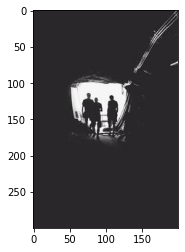

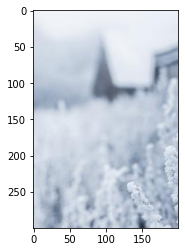

tensor([[[[0.9373, 0.9373, 0.9373,  ..., 0.9176, 0.9176, 0.9176],
          [0.9373, 0.9373, 0.9373,  ..., 0.9176, 0.9176, 0.9176],
          [0.9373, 0.9373, 0.9373,  ..., 0.9176, 0.9176, 0.9176],
          ...,
          [0.8000, 0.7922, 0.7882,  ..., 0.5882, 0.5961, 0.6078],
          [0.7804, 0.7765, 0.7725,  ..., 0.6118, 0.6235, 0.6353],
          [0.7647, 0.7608, 0.7569,  ..., 0.6118, 0.6235, 0.6392]],

         [[0.9490, 0.9490, 0.9490,  ..., 0.9333, 0.9333, 0.9333],
          [0.9490, 0.9490, 0.9490,  ..., 0.9333, 0.9333, 0.9333],
          [0.9490, 0.9490, 0.9490,  ..., 0.9333, 0.9333, 0.9333],
          ...,
          [0.8314, 0.8235, 0.8196,  ..., 0.6392, 0.6471, 0.6588],
          [0.8118, 0.8078, 0.8039,  ..., 0.6627, 0.6745, 0.6863],
          [0.7961, 0.7922, 0.7882,  ..., 0.6627, 0.6745, 0.6902]],

         [[0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
          [0.9686, 0.9686, 0.9686,  ..., 0.9686, 0.9686, 0.9686],
          [0.9686, 0.9686, 0.9686,  ..., 0

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import torchvision
%matplotlib inline

'#1.Step: Define url'
url = "https://picsum.photos/200/300"
response = requests.get(url)
'#2.Step: Load image'
img = Image.open(BytesIO(response.content))


'#3.step: Convert to numpy array with the shape height, width, dimensions'
images = np.array(img)
print("#"*10)
print(f"shape of the numpy: height x width x dimensions")
print(f"shape of the numpy array: {images.shape} ")
print(f"height:{images.shape[0]}, width:{images.shape[1]}, dimensions: {images.shape[2]}")

'#4.Step: Convert to tensor. The shape of a tensor is dimensions, height, width. So the place of the dimension got swapped '
tensor = torchvision.transforms.ToTensor()(images)
print("#"*10)
print(f"shape of the tensor: dimensions x height x width")
print(f"shape of the tensor: {tensor.shape} ")
print(f"dimensions:{tensor.shape[0]}, height:{tensor.shape[1]}, width: {tensor.shape[2]}")

'#5.Step: Convert to a tensor batch, in oder that DNN can read it'
print("#"*10)
tensor_batch = tensor.unsqueeze(0)
print(f"shape of the tensor batch: size x  dimensions x height x width")
print(f"shape of the tensor: {tensor_batch.shape} ")
print(f"size:{tensor_batch.shape[0]}, dimensions:{tensor_batch.shape[1]}, height: {tensor_batch.shape[2]}, width: {tensor_batch.shape[3]}")

'#6.Step: Convert back to PIL to show that image hasnt change throught the convertion process'
'#6.1.Step: Select first tensor in batch and convert it'
reverse_transformation= torchvision.transforms.functional.to_pil_image(tensor_batch[0])
plt.imshow(reverse_transformation)
plt.show()

def url_tensor_batch(url):
  """
  @description:
    Converts based on an url path an image to an tensor batch.
  @args:
    url (str): "https://picsum.photos/200/300"
  @return:
    tensor_batch (pytorch.tensor)
  """
  '#1.step: request image'
  response = requests.get(url)
  '#2.Step: Load image'
  img = Image.open(BytesIO(response.content))
  '#3.step: Convert to numpy array with the shape height, width, dimensions'
  images = np.array(img)
  '#4.Step: Convert to tensor. The shape of a tensor is dimensions, height, width. So the place of the dimension got swapped '
  tensor = torchvision.transforms.ToTensor()(images)
  '#5.Step: Convert to a tensor batch, in oder that DNN can read it'
  tensor_batch = tensor.unsqueeze(0)
  '#6.1.Step: Select first tensor in batch and convert it'
  reverse_transformation= torchvision.transforms.functional.to_pil_image(tensor_batch[0])
  plt.imshow(reverse_transformation)
  plt.show()
  return tensor_batch






## Multi-Layer Perceptron, MNIST

![alt text](https://drive.google.com/uc?id=1oug4yCqqmCX7k8kb3yY3ZMee3DF28_b_)

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
################ Helper function################
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

####################################
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


NameError: ignored

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


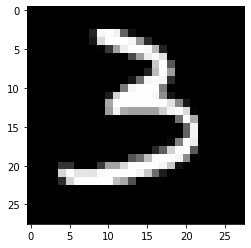

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
################ Helper function################
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

####################################
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.MNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.MNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)


%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

Now we have 10 outputs for our network. We want to pass in an image to our network and <br>
get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this:


Here we see that the probability for each class is roughly the same. This is representing an untrained network, <br>
it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.



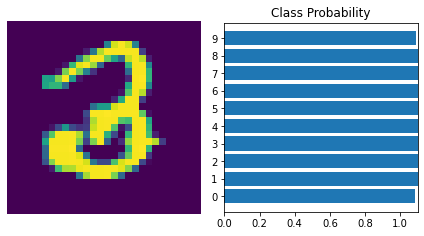

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build Network - Option 1
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Build a feed-forward network - Option 2 
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)
# Build a feed-forward network - Option 3
"""
#You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. 
Note that dictionary keys must be unique, so each operation must have a different name.
"""
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))


criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)



images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
print("""
Now we have 10 outputs for our network. We want to pass in an image to our network and <br>
get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this:
""")
view_classify(img.view(1, 28, 28), ps)
print("""
Here we see that the probability for each class is roughly the same. This is representing an untrained network, <br>
it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.
""")

In [ ]:
'Get the number of parameteres'
sum(p.numel() for p in model.parameters())

109386

Training loss: -0.44254990926869603
Training loss: -0.7592113407414044
Training loss: -0.8114800686386067
Training loss: -0.8227067342959936
Training loss: -0.82998163342815


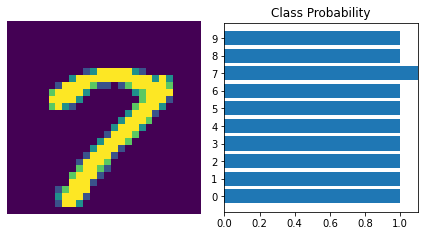

In [ ]:
# Training of the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        # Forward pass, then backward pass, then update weights
        output = model.forward(images)
        # Calculate the loss with the logits and the labels
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
        
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

## CNN

## Filter

<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


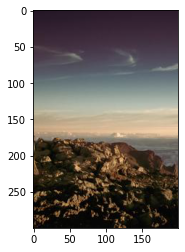

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

%matplotlib inline



url = "https://picsum.photos/200/300"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
#Convert to numpy
image = np.array(img)

# Read in the image

plt.imshow(image)
print(type(image))
print(type(img))



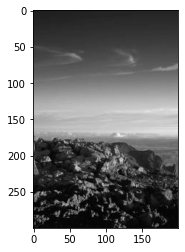

In [ ]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')



0


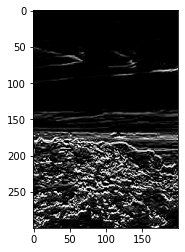

In [ ]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ 0, 10, 0], 
                   [ 0, -8, 0], 
                   [ 0, -2, 0]])


print(sobel_y.sum())
## TODO: Create and apply a Sobel x operator


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

## CNN Example

we visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer.

In this example, we are defining four filters that are applied to an input image by initializing the weights of a convolutional layer, but a trained CNN will learn the values of these weights.

<img src="https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/CNN_all_layers.png?raw=true">


Import the image

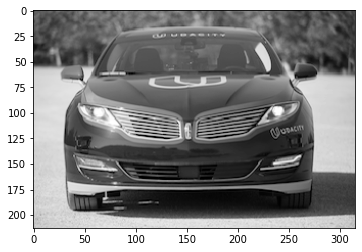

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

%matplotlib inline

import cv2
import numpy as np
import requests

# load color image 
url = 'https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/udacity_car.png?raw=true'
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
bgr_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

#### Define and visualize the filters


In [ ]:
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1], 
                        [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [ ]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


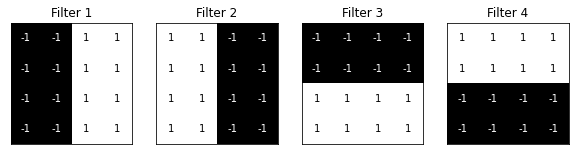

In [ ]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')



### Define a convolutional layer 

The various layers that make up any neural network are documented, [here](http://pytorch.org/docs/stable/nn.html). For a convolutional neural network, we'll start by defining a:
* Convolutional layer

Initialize a single convolutional layer so that it contains all your created filters. Note that you are not training this network; you are initializing the weights in a convolutional layer so that you can visualize what happens after a forward pass through this network!


##### `__init__` and `forward`
To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the forward behavior of a network that applyies those initialized layers to an input (`x`) in the function `forward`. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python. 

Below, I define the structure of a class called `Net` that has a convolutional layer that can contain four 3x3 grayscale filters.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [ ]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

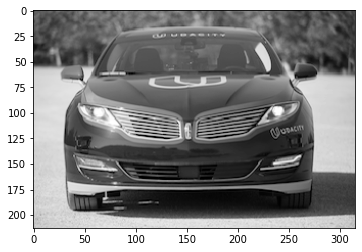

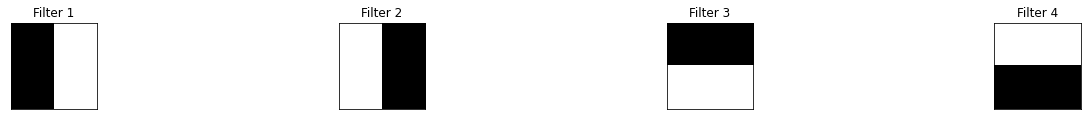

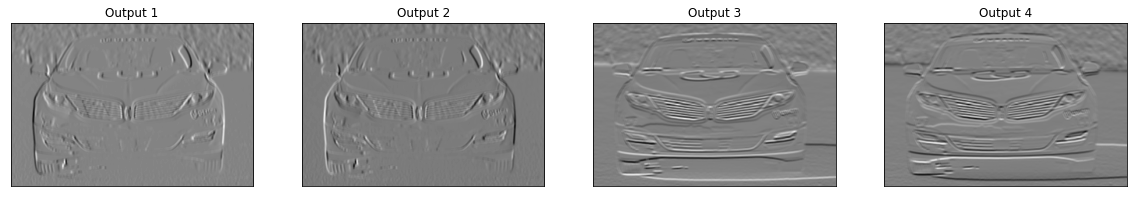

In [ ]:
#Let's look at the output of a convolutional layer, before and after a ReLu activation function is applied.
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

### Pytorch CNN 

### Convolutional Neural Networks
---
 we train a **CNN** to classify images from the CIFAR-10 database.

The images in this database are small color images that fall into one of ten classes; some example images are pictured below.

#### Test for CUDA
Since these are larger (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, only they utilize GPU's for computation.

In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


#### Visualize a Batch of Training Data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

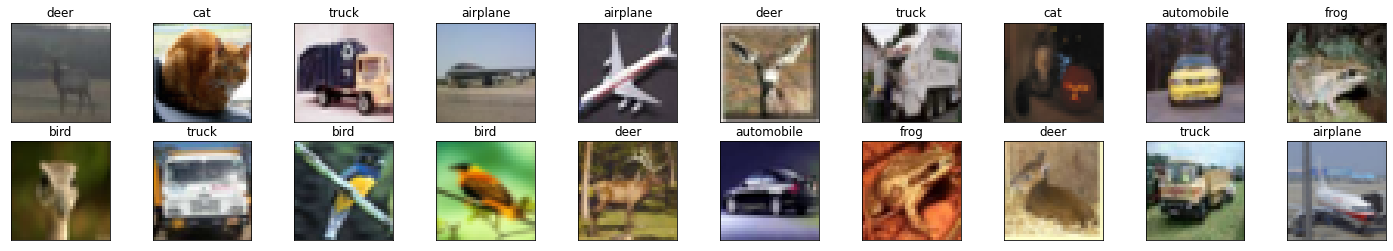

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

#### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.

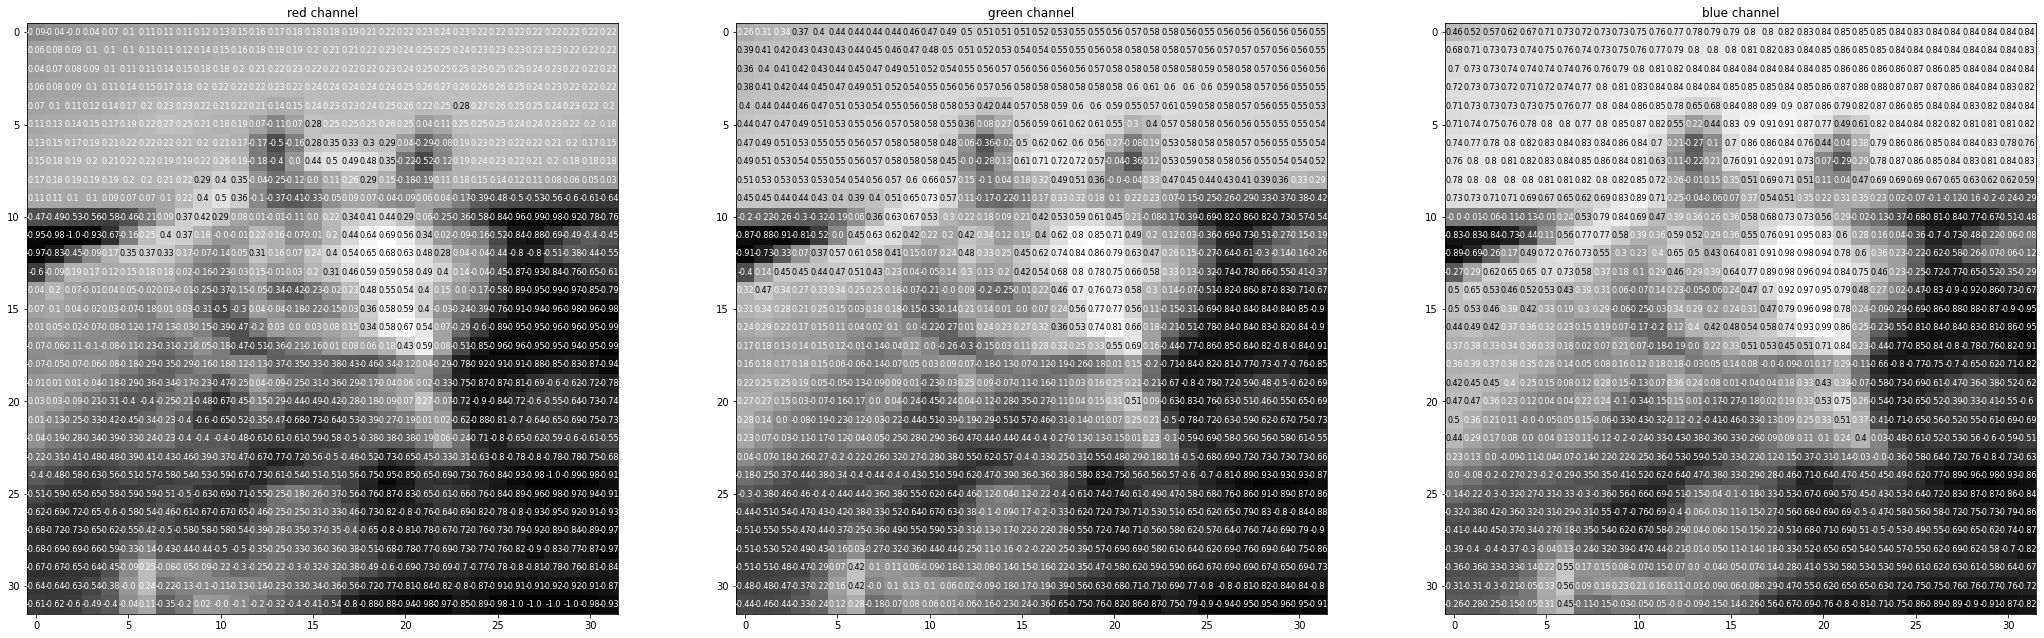

In [ ]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

---
#### Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

This time, you'll define a CNN architecture. Instead of an MLP, which used linear, fully-connected layers, you'll use the following:
* [Convolutional layers](https://pytorch.org/docs/stable/nn.html#conv2d), which can be thought of as stack of filtered images.
* [Maxpooling layers](https://pytorch.org/docs/stable/nn.html#maxpool2d), which reduce the x-y size of an input, keeping only the most _active_ pixels from the previous layer.
* The usual Linear + Dropout layers to avoid overfitting and produce a 10-dim output.

A network with 2 convolutional layers is shown in the image below and in the code, and you've been given starter code with one convolutional and one maxpooling layer.


#### TODO: Define a model with multiple convolutional layers, and define the feedforward metwork behavior.

The more convolutional layers you include, the more complex patterns in color and shape a model can detect. It's suggested that your final model include 2 or 3 convolutional layers as well as linear layers + dropout in between to avoid overfitting. 

It's good practice to look at existing research and implementations of related models as a starting point for defining your own models. You may find it useful to look at [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) or [this, more complex Keras example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py) to help decide on a final structure.

#### Output volume for a convolutional layer

To compute the output size of a given convolutional layer we can perform the following calculation (taken from [Stanford's cs231n course](http://cs231n.github.io/convolutional-networks/#layers)):
> We can compute the spatial size of the output volume as a function of the input volume size (W), the kernel/filter size (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. The correct formula for calculating how many neurons define the output_W is given by `(W−F+2P)/S+1`. 

For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.

#### Caculate the output size

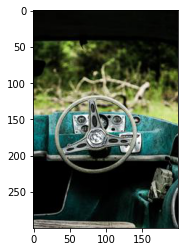

Net(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
##Input dimensions: (300, 200, 3)
##Output dimensions of conv_x1: torch.Size([1, 16, 300, 200])
##Output dimensions of conv_x2: torch.Size([1, 32, 300, 200])


In [ ]:
## Caculate the output size
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline
from PIL import Image
import requests
from io import BytesIO


'#1.Step: Define image'
tensor_batch = url_tensor_batch("https://picsum.photos/200/300")
'#2.Step: Define model'
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

        self.conv = nn.Conv2d(3, 16, 3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x1 = self.conv(x)
        activated_x = F.relu(conv_x1)
        conv_x2 = self.conv2(activated_x)
        activated_x = F.relu(conv_x2)
        
        # returns both layers
        return conv_x1,conv_x2
    

'#3.Stepprint out the layer in the network'
model = Net()
print(model)
'#4.Step: Print out the input and output dimensionens'
conv_x1,conv_x2= model(tensor_batch)
print(f"##Input dimensions: {images.shape}")
print(f"##Output dimensions of conv_x1: {conv_x1.shape}")
print(f"##Output dimensions of conv_x2: {conv_x2.shape}")


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        #nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x32x32 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [ ]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.674042 	Validation Loss: 0.369985
Validation loss decreased (inf --> 0.369985).  Saving model ...
Epoch: 2 	Training Loss: 1.352181 	Validation Loss: 0.302862
Validation loss decreased (0.369985 --> 0.302862).  Saving model ...
Epoch: 3 	Training Loss: 1.204668 	Validation Loss: 0.276177
Validation loss decreased (0.302862 --> 0.276177).  Saving model ...
Epoch: 4 	Training Loss: 1.112792 	Validation Loss: 0.255403
Validation loss decreased (0.276177 --> 0.255403).  Saving model ...
Epoch: 5 	Training Loss: 1.035302 	Validation Loss: 0.237027
Validation loss decreased (0.255403 --> 0.237027).  Saving model ...
Epoch: 6 	Training Loss: 0.964890 	Validation Loss: 0.229888
Validation loss decreased (0.237027 --> 0.229888).  Saving model ...
Epoch: 7 	Training Loss: 0.909800 	Validation Loss: 0.209166
Validation loss decreased (0.229888 --> 0.209166).  Saving model ...
Epoch: 8 	Training Loss: 0.855504 	Validation Loss: 0.198120
Validation loss decreased (0.20916

####  Load the Model with the Lowest Validation Loss

In [ ]:
model.load_state_dict(torch.load('model_cifar.pt'))

---
#### Test the Trained Network

Test your trained model on previously unseen data! A "good" result will be a CNN that gets around 70% (or more, try your best!) accuracy on these test images.

In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.738173

Test Accuracy of airplane: 74% (743/1000)
Test Accuracy of automobile: 85% (856/1000)
Test Accuracy of  bird: 71% (711/1000)
Test Accuracy of   cat: 52% (529/1000)
Test Accuracy of  deer: 74% (741/1000)
Test Accuracy of   dog: 70% (708/1000)
Test Accuracy of  frog: 85% (857/1000)
Test Accuracy of horse: 78% (789/1000)
Test Accuracy of  ship: 86% (862/1000)
Test Accuracy of truck: 83% (835/1000)

Test Accuracy (Overall): 76% (7631/10000)


#### Question: What are your model's weaknesses and how might they be improved?

**Answer**: This model seems to do best on vehicles rather than animals. For example, it does best on the automobile class and worst on the cat class. I suspect it's because animals vary in color and size and so it would improve this model if I could increase the number of animal images in the first place or perhaps if I added another convolutional layer to detect finer patterns in these images. I could also experiment with a smaller learning rate so that the model takes small steps in the right direction as it is training.

In [ ]:
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)

RuntimeError: ignored

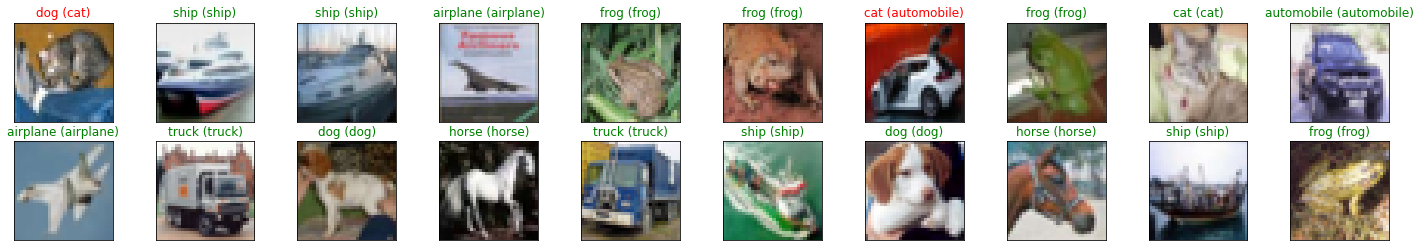

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()


# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# onvert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

## PyTorch - Transfer Learning

Inspired by: https://www.youtube.com/watch?v=fOiQFXItYe4

Most of the time you won't want to train a whole convolutional network yourself. Modern ConvNets training on huge datasets like ImageNet take weeks on multiple GPUs. 
> Instead, most people use a pretrained network either as a fixed feature extractor, or as an initial network to fine tune. 

In this notebook, you'll be using [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) trained on the [ImageNet dataset](http://www.image-net.org/) as a feature extractor. Below is a diagram of the VGGNet architecture, with a series of convolutional and maxpooling layers, then three fully-connected layers at the end that classify the 1000 classes found in the ImageNet database.

VGGNet is great because it's simple and has great performance, coming in second in the ImageNet competition. The idea here is that we keep all the convolutional layers, but **replace the final fully-connected layer** with our own classifier. This way we can use VGGNet as a _fixed feature extractor_ for our images then easily train a simple classifier on top of that. 
* Use all but the last fully-connected layer as a fixed feature extractor.
* Define a new, final classification layer and apply it to a task of our choice!

You can read more about transfer learning from [the CS231n Stanford course notes](http://cs231n.github.io/transfer-learning/).

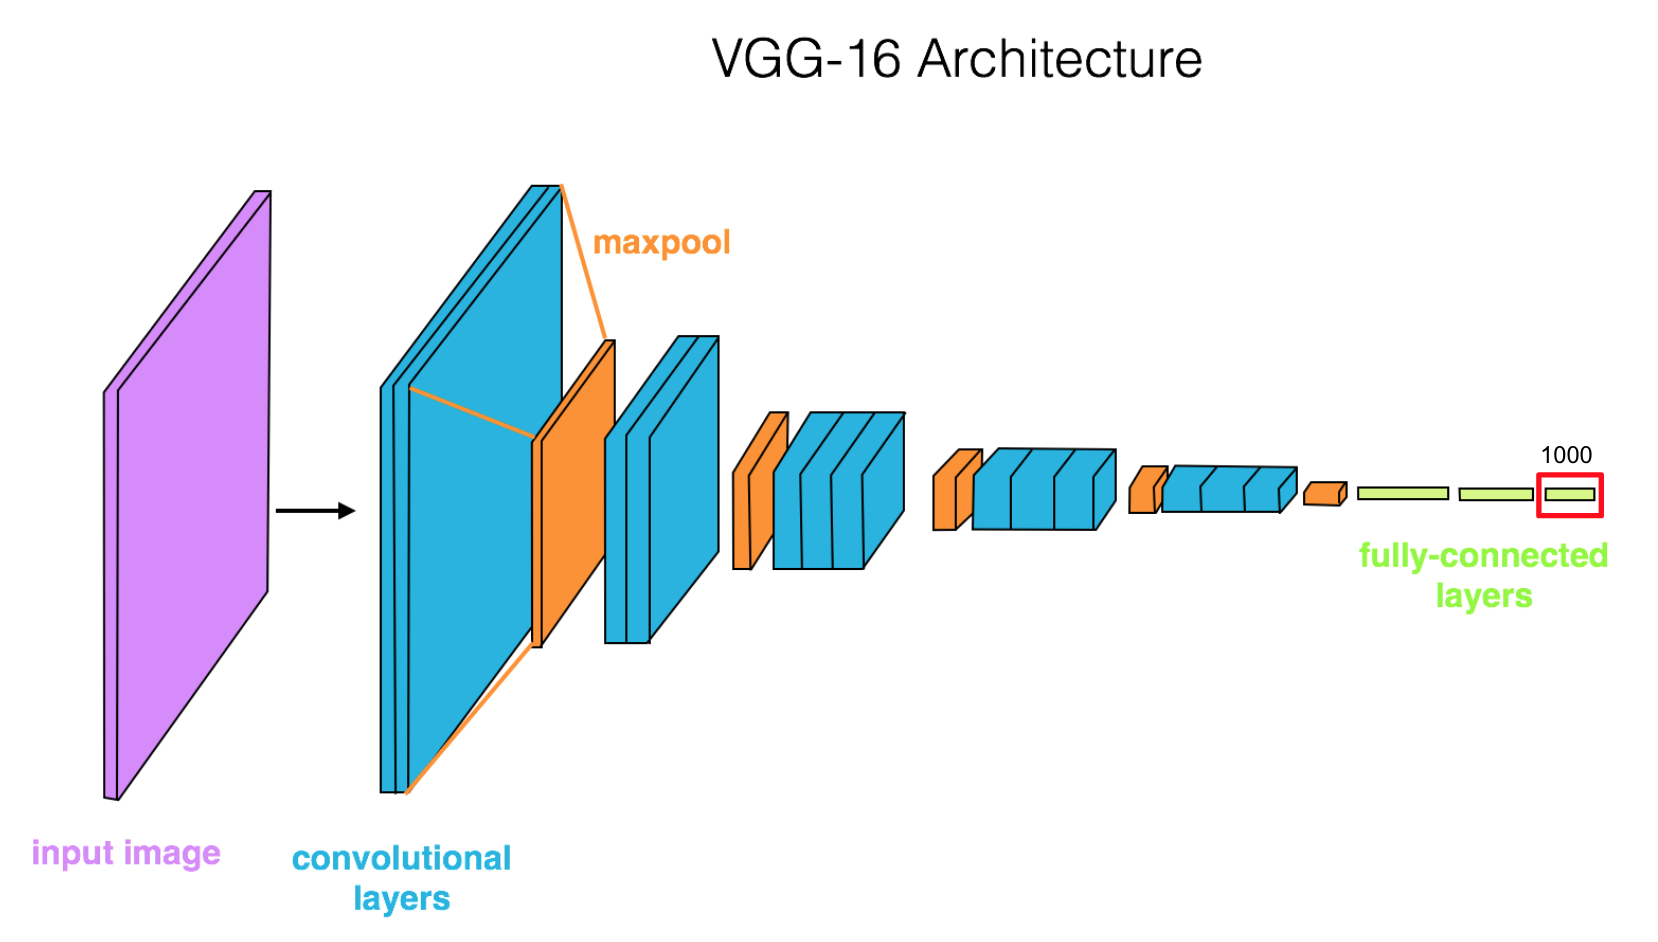

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline

import cv2
import numpy as np
import requests
# load color image 
url = "https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/vgg_16_architecture.png?raw=true"
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
bgr_img = cv2.imdecode(image, cv2.IMREAD_COLOR)
cv2_imshow(bgr_img)


In [ ]:
# Install git lfs first to download the data 
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install


Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 6,877 kB of archives.
After this operation, 16.4 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.11.0 [6,877 kB]
Fetched 6,877 kB in 1s (7,091 kB/s)
Selecting previously unsele

In [ ]:
# Clone the repo
!git clone https://github.com/gwillig/maschine-learning-notebooks-for-interns.git

Cloning into 'maschine-learning-notebooks-for-interns'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 103 (delta 46), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (103/103), 9.94 MiB | 3.71 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
#Unzip file to the current cwd()
import zipfile
path_data_zip = "maschine-learning-notebooks-for-interns/flower_photos.zip"
with zipfile.ZipFile(path_data_zip, 'r') as zip_ref:
    zip_ref.extractall()

#### Flower power

Here we'll be using VGGNet to classify images of flowers. We'll start, as usual, by importing our usual resources. And checking if we can train our model on GPU.

#### Download Data

The flower data is available in a zip file in this lesson's resources, for download to your local environment. In the case of this notebook, the data is already downloaded and in the directory `flower_photos/`.

In [ ]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


#### Load and Transform our Data

We'll be using PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) class which makes is very easy to load data from a directory. For example, the training images are all stored in a directory path that looks like this:
```
root/class_1/xxx.png
root/class_1/xxy.png
root/class_1/xxz.png

root/class_2/123.png
root/class_2/nsdf3.png
root/class_2/asd932_.png
```

Where, in this case, the root folder for training is `flower_photos/train/` and the classes are the names of flower types.

In [ ]:
# define training and test data directories
data_dir = 'flower_photos/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

#### Transforming the Data

When we perform transfer learning, we have to shape our input data into the shape that the pre-trained model expects. VGG16 expects `224`-dim square images as input and so, we resize each flower image to fit this mold.

In [ ]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  3130
Num test images:  540


In [ ]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)




#### DataLoaders and Data Visualization

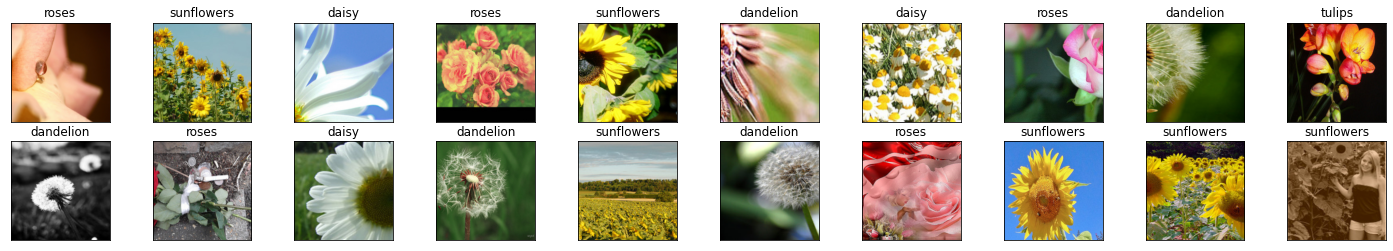

In [ ]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

---
#### Define the Model

To define a model for training we'll follow these steps:
1. Load in a pre-trained VGG16 model
2. "Freeze" all the parameters, so the net acts as a fixed feature extractor 
3. Remove the last layer
4. Replace the last layer with a linear classifier of our own

**Freezing simply means that the parameters in the pre-trained model will *not* change during training.**


In [ ]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [ ]:
print(vgg16.classifier[6].in_features) 
print("Here we can see that it was train to classify 1000 differnt classes")
print(vgg16.classifier[6].out_features) 


4096
1000


In [ ]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

## Convolutional Autoencoder

Sticking with the MNIST dataset, let's improve our autoencoder's performance using convolutional layers. We'll build a convolutional autoencoder to compress the MNIST dataset. 

>The encoder portion will be made of convolutional and pooling layers and the decoder will be made of **transpose convolutional layers** that learn to "upsample" a compressed representation.

<img src='https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/autoencoder_1.png?raw=true' />

### Compressed Representation

A compressed representation can be great for saving and sharing any kind of data in a way that is more efficient than storing raw data. In practice, the compressed representation often holds key information about an input image and we can use it for denoising images or other kinds of reconstruction and transformation!

<img src='https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/denoising.png?raw=true' width=60%/>

Let's get started by importing our libraries and getting the dataset.

In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!




/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Create training and test dataloaders

num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

### Visualize the Data

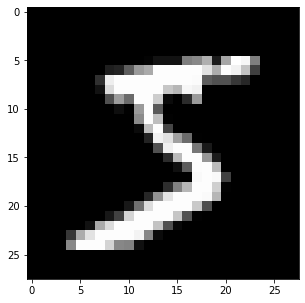

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

---
### Convolutional  Autoencoder

#### Encoder
The encoder part of the network will be a typical convolutional pyramid. Each convolutional layer will be followed by a max-pooling layer to reduce the dimensions of the layers. 

#### Decoder

The decoder though might be something new to you. The decoder needs to convert from a narrow representation to a wide, reconstructed image. For example, the representation could be a 7x7x4 max-pool layer. This is the output of the encoder, but also the input to the decoder. We want to get a 28x28x1 image out from the decoder so we need to work our way back up from the compressed representation. A schematic of the network is shown below.

<img src='https://github.com/gwillig/maschine-learning-notebooks-for-interns/blob/master/conv_enc_1.png?raw=true' width=640px>

Here our final encoder layer has size 7x7x4 = 196. The original images have size 28x28 = 784, so the encoded vector is 25% the size of the original image. These are just suggested sizes for each of the layers. Feel free to change the depths and sizes, in fact, you're encouraged to add additional layers to make this representation even smaller! Remember our goal here is to find a small representation of the input data.

### Transpose Convolutions, Decoder

This decoder uses **transposed convolutional** layers to increase the width and height of the input layers. They work almost exactly the same as convolutional layers, but in reverse. A stride in the input layer results in a larger stride in the transposed convolution layer. For example, if you have a 3x3 kernel, a 3x3 patch in the input layer will be reduced to one unit in a convolutional layer. Comparatively, one unit in the input layer will be expanded to a 3x3 path in a transposed convolution layer. PyTorch provides us with an easy way to create the layers, [`nn.ConvTranspose2d`](https://pytorch.org/docs/stable/nn.html#convtranspose2d). 

It is important to note that transpose convolution layers can lead to artifacts in the final images, such as checkerboard patterns. This is due to overlap in the kernels which can be avoided by setting the stride and kernel size equal. In [this Distill article](http://distill.pub/2016/deconv-checkerboard/) from Augustus Odena, *et al*, the authors show that these checkerboard artifacts can be avoided by resizing the layers using nearest neighbor or bilinear interpolation (upsampling) followed by a convolutional layer. 

> We'll show this approach in another notebook, so you can experiment with it and see the difference.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 1 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)


    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
                
        return x

# initialize the NN
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


---
#### Training

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

We are not concerned with labels in this case, just images, which we can get from the `train_loader`. Because we're comparing pixel values in input and output images, it will be best to use a loss that is meant for a regression task. Regression is all about comparing quantities rather than probabilistic values. So, in this case, I'll use `MSELoss`. And compare output images and input images as follows:
```
loss = criterion(outputs, images)
```

Otherwise, this is pretty straightfoward training with PyTorch. Since this is a convlutional autoencoder, our images _do not_ need to be flattened before being passed in an input to our model.

In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 30

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.438710
Epoch: 2 	Training Loss: 0.275646
Epoch: 3 	Training Loss: 0.256414
Epoch: 4 	Training Loss: 0.243934
Epoch: 5 	Training Loss: 0.233885
Epoch: 6 	Training Loss: 0.226961
Epoch: 7 	Training Loss: 0.222148
Epoch: 8 	Training Loss: 0.218336
Epoch: 9 	Training Loss: 0.215015
Epoch: 10 	Training Loss: 0.212245
Epoch: 11 	Training Loss: 0.209866
Epoch: 12 	Training Loss: 0.207638
Epoch: 13 	Training Loss: 0.205748
Epoch: 14 	Training Loss: 0.204075
Epoch: 15 	Training Loss: 0.202211
Epoch: 16 	Training Loss: 0.200678
Epoch: 17 	Training Loss: 0.199318
Epoch: 18 	Training Loss: 0.198002
Epoch: 19 	Training Loss: 0.196842
Epoch: 20 	Training Loss: 0.195772
Epoch: 21 	Training Loss: 0.194804
Epoch: 22 	Training Loss: 0.193898
Epoch: 23 	Training Loss: 0.193127
Epoch: 24 	Training Loss: 0.192460
Epoch: 25 	Training Loss: 0.191876
Epoch: 26 	Training Loss: 0.191366
Epoch: 27 	Training Loss: 0.190915
Epoch: 28 	Training Loss: 0.190518
Epoch: 29 	Training Loss: 0.1

### Checking out the results

Below I've plotted some of the test images along with their reconstructions. These look a little rough around the edges, likely due to the checkerboard effect we mentioned above that tends to happen with transpose layers.

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of iages
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)